In [ ]:
!pip install xarray
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

# Define base directory and expected file count
base_dir = "/content/drive/MyDrive/ENVS333/SH"
expected_file_count = 114

# Finding all .nc files from 2010 to 2020
all_files = [file for year in range(2010, 2021)
             for file in glob.glob(f"{base_dir}/{year}/*.nc")]

# Print file count and any missing files
print(f"Total files found: {len(all_files)}")
if len(all_files) != expected_file_count:
    print(f"Warning: Expected {expected_file_count}, but found {len(all_files)}.")


Mounted at /content/drive
Total files found: 114


In [ ]:
#converting the .nc to files to dataframes
dataframes = []

for file_path in all_files:
    try:
        df = xr.open_dataset(file_path).to_dataframe().reset_index()
        dataframes.append(df)
        print(f"Converted {file_path} to DataFrame.")
    except Exception as e:
        print(f"Error converting {file_path}: {e}")

# Combine all DataFrames
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print("\nCombined DataFrame shape:", combined_df.shape)
    print("\nFirst few rows:\n", combined_df.head())


Converted /content/drive/MyDrive/ENVS333/SH/2010/ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-SH_50KM_EASE2-201012-fv3p0.nc to DataFrame.
Converted /content/drive/MyDrive/ENVS333/SH/2010/ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-SH_50KM_EASE2-201011-fv3p0.nc to DataFrame.
Converted /content/drive/MyDrive/ENVS333/SH/2011/ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-SH_50KM_EASE2-201104-fv3p0.nc to DataFrame.
Converted /content/drive/MyDrive/ENVS333/SH/2011/ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-SH_50KM_EASE2-201105-fv3p0.nc to DataFrame.
Converted /content/drive/MyDrive/ENVS333/SH/2011/ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-SH_50KM_EASE2-201108-fv3p0.nc to DataFrame.
Converted /content/drive/MyDrive/ENVS333/SH/2011/ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-SH_50KM_EASE2-201107-fv3p0.nc to DataFrame.
Converted /content/drive/MyDrive/ENVS333/SH/2011/ESACCI-SEAICE-L3C-SITHICK-SIRAL_CRYOSAT2-SH_50KM_EASE2-201103-fv3p0.nc to DataFrame.
Converted /content/drive/MyDrive/ENVS333/SH/2011/ESACCI-SEAICE

In [ ]:
#storing the values as dataframes
# Save the combined DataFrame to a CSV file in Google Drive
output_file_path = "/content/drive/MyDrive/ENVS333/SH/combined_data.csv"
combined_df.to_csv(output_file_path, index=False)  # Set index=False to avoid saving the DataFrame index
print(f"\nDataFrame saved to: {output_file_path}")



DataFrame saved to: /content/drive/MyDrive/ENVS333/SH/combined_data.csv


In [ ]:
#checking what is the head of the file
print(combined_df.head())

       yc      xc       time  nv        lat        lon  quality_flag  \
0  5375.0 -5375.0 2010-12-01   0 -16.822885 -45.000000             3   
1  5375.0 -5375.0 2010-12-01   1 -16.822885 -45.000000             3   
2  5375.0 -5325.0 2010-12-01   0 -17.219100 -44.732265             3   
3  5375.0 -5325.0 2010-12-01   1 -17.219100 -44.732265             3   
4  5375.0 -5275.0 2010-12-01   0 -17.612430 -44.462027             3   

   radar_freeboard  radar_freeboard_uncertainty  region_code  \
0              NaN                          NaN           -1   
1              NaN                          NaN           -1   
2              NaN                          NaN           -1   
3              NaN                          NaN           -1   
4              NaN                          NaN           -1   

   sea_ice_concentration  sea_ice_freeboard  sea_ice_freeboard_uncertainty  \
0                    NaN                NaN                            NaN   
1                    NaN  

In [ ]:
print(combined_df.info())   # Column types and missing values
print(combined_df.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10637568 entries, 0 to 10637567
Data columns (total 20 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   yc                             float64       
 1   xc                             float64       
 2   time                           datetime64[ns]
 3   nv                             int64         
 4   lat                            float64       
 5   lon                            float64       
 6   quality_flag                   int8          
 7   radar_freeboard                float32       
 8   radar_freeboard_uncertainty    float32       
 9   region_code                    int8          
 10  sea_ice_concentration          float32       
 11  sea_ice_freeboard              float32       
 12  sea_ice_freeboard_uncertainty  float32       
 13  sea_ice_thickness              float32       
 14  sea_ice_thickness_uncertainty  float32       
 15  snow_depth   

In [ ]:
# Show only columns with missing values
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])


radar_freeboard                  9735770
radar_freeboard_uncertainty      9735770
sea_ice_concentration            5040644
sea_ice_freeboard                9735770
sea_ice_freeboard_uncertainty    9742558
sea_ice_thickness                9735770
sea_ice_thickness_uncertainty    9742558
snow_depth                       9658532
snow_depth_uncertainty           9630304
dtype: int64


In [ ]:
#average of sea ice thickness values
if 'sea_ice_thickness' in combined_df.columns:
    # Remove rows with NaN values in the 'sea_ice_thickness' column
    combined_df_cleaned = combined_df.dropna(subset=['sea_ice_thickness']) #removing the NaN values then calculating the mean

    # Calculate the average sea ice thickness for the cleaned data
    average_thickness = combined_df_cleaned['sea_ice_thickness'].mean()

    print(f"Average sea ice thickness (excluding NaN values): {average_thickness} m")
else:
    print("sea_ice_thickness column not found in the combined DataFrame.")

Average sea ice thickness (excluding NaN values): 1.5982536295521954 m


In [ ]:
#sum of sea ice thickness
if 'sea_ice_thickness' in combined_df.columns:
    # Remove NaN values before calculating the sum
    valid_thickness_values = combined_df['sea_ice_thickness'].dropna()

    if not valid_thickness_values.empty:
        total_thickness = valid_thickness_values.sum()
        print(f"Total Sea Ice Thickness: {total_thickness:.2f} m")
    else:
        print("No valid sea ice thickness values found after removing NaN values.")
else:
    print("sea_ice_thickness column not found in the combined DataFrame.")


Total Sea Ice Thickness: 270872.03 m


In [ ]:
# prompt: get the coulumn names

combined_df.columns


Index(['yc', 'xc', 'time', 'nv', 'lat', 'lon', 'quality_flag',
       'radar_freeboard', 'radar_freeboard_uncertainty', 'region_code',
       'sea_ice_concentration', 'sea_ice_freeboard',
       'sea_ice_freeboard_uncertainty', 'sea_ice_thickness',
       'sea_ice_thickness_uncertainty', 'snow_depth', 'snow_depth_uncertainty',
       'status_flag', 'time_bnds', 'Lambert_Azimuthal_Grid'],
      dtype='object')

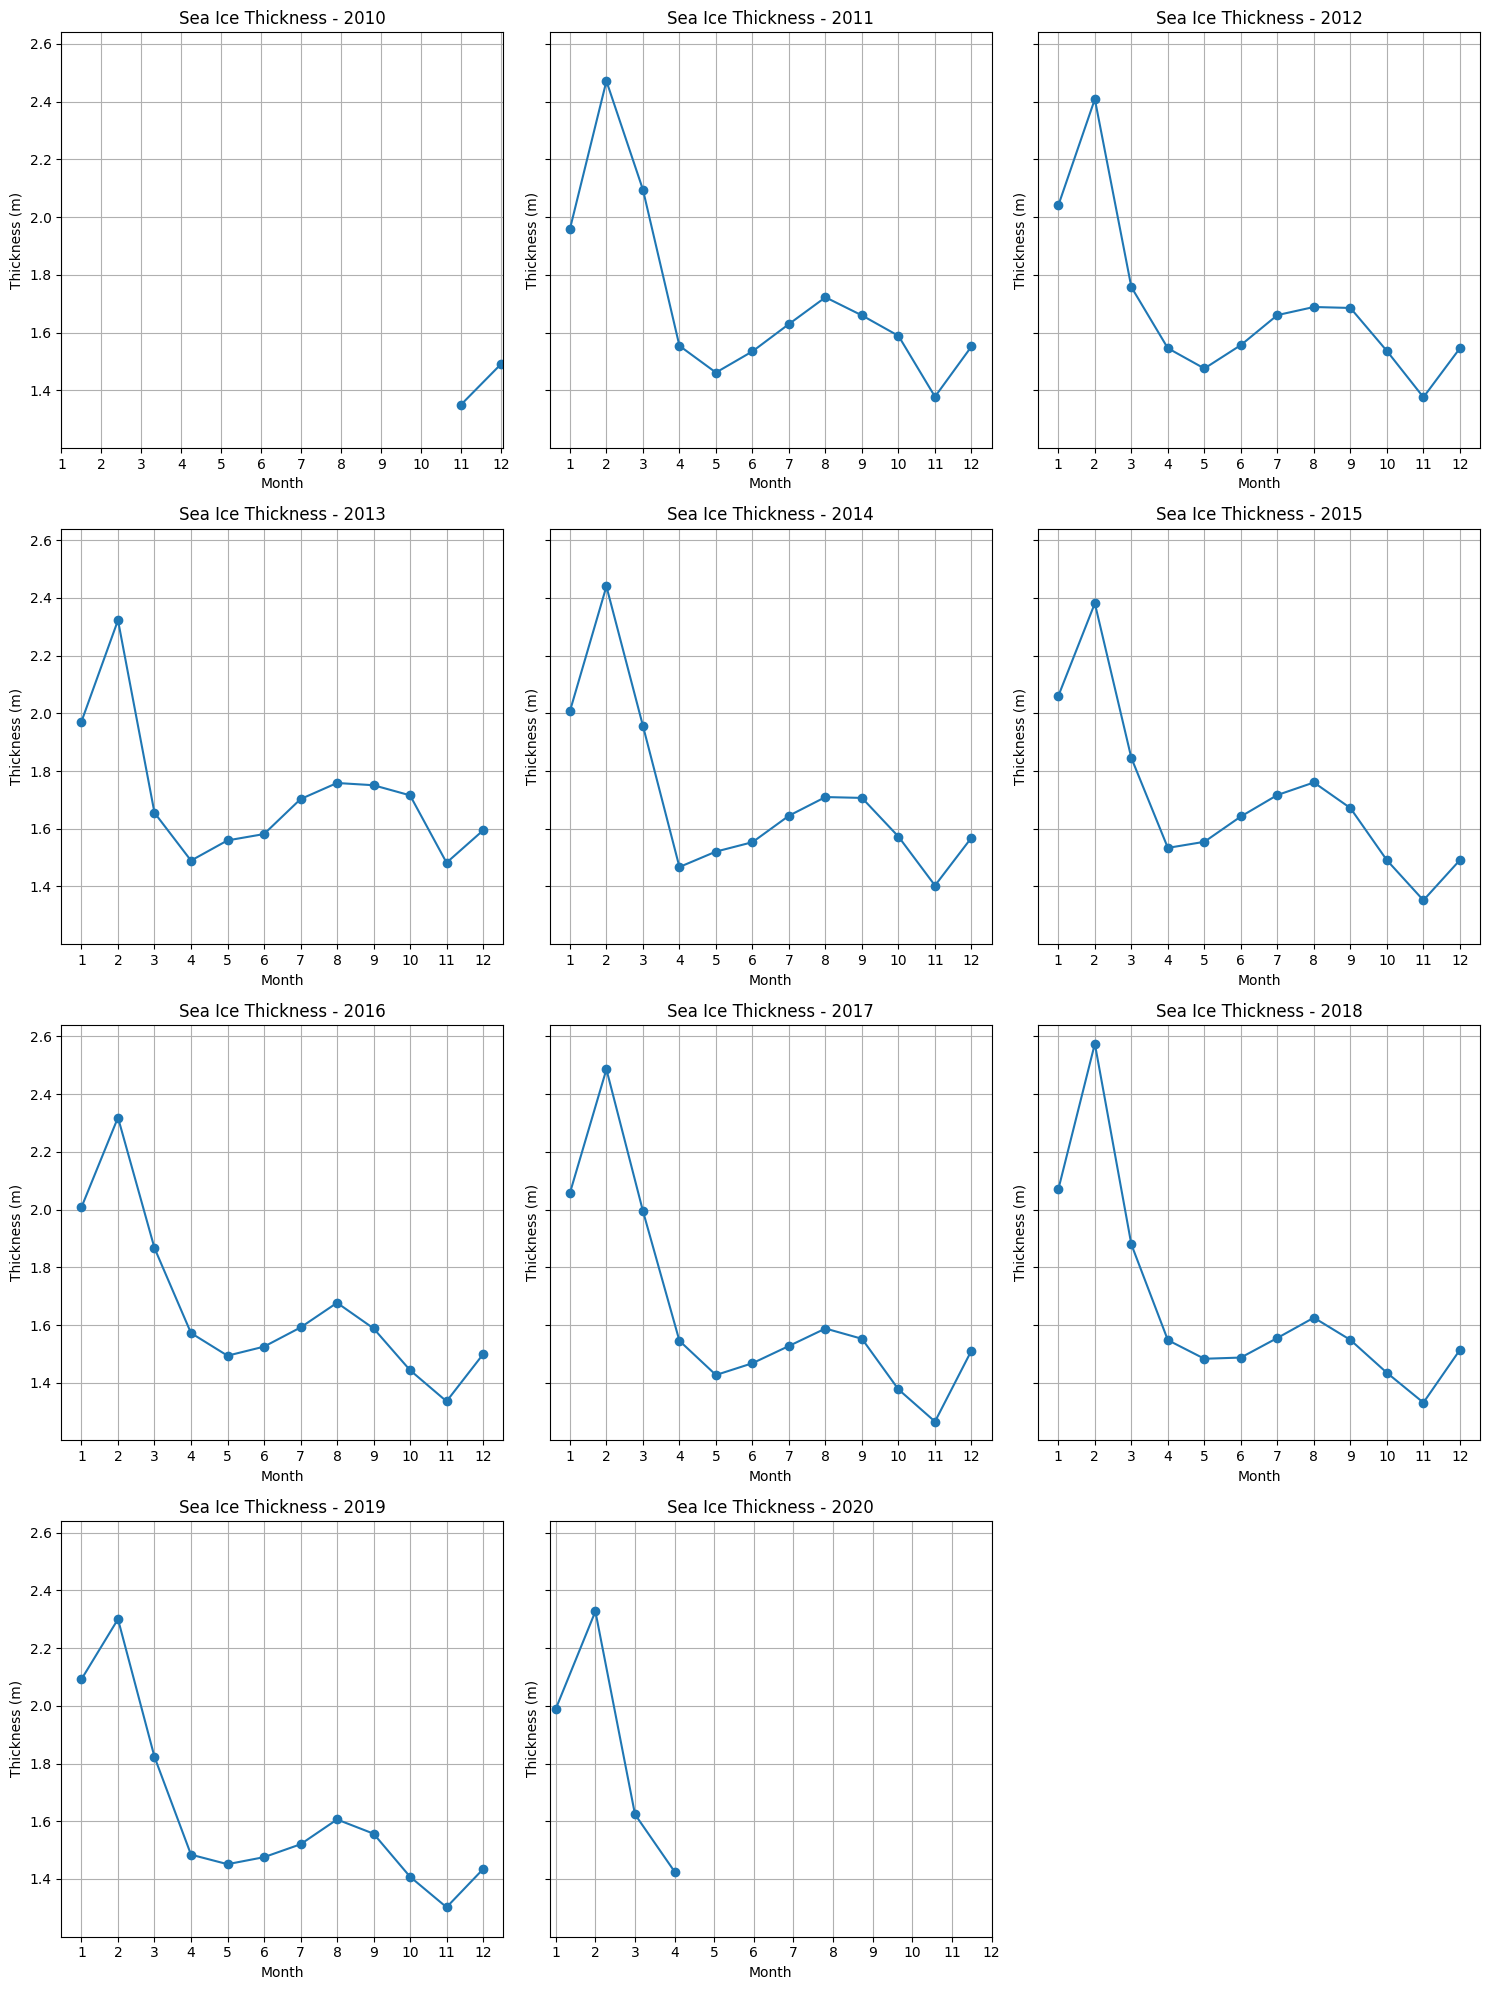

In [ ]:
#subplots of each year with the months of data available for it

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert 'time' column to datetime if not already
combined_df['time'] = pd.to_datetime(combined_df['time'])

# Extract year and month
combined_df['year'] = combined_df['time'].dt.year
combined_df['month'] = combined_df['time'].dt.month

# Group by year and month, compute mean sea ice thickness
monthly_thickness = combined_df.groupby(['year', 'month'])['sea_ice_thickness'].mean().reset_index()

# making the plot
years = sorted(monthly_thickness['year'].unique())
n_years = len(years)
cols = 3
rows = (n_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharey=True)
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    data = monthly_thickness[monthly_thickness['year'] == year]
    ax.plot(data['month'], data['sea_ice_thickness'], marker='o')
    ax.set_title(f"Sea Ice Thickness - {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Thickness (m)")
    ax.set_xticks(range(1, 13))
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


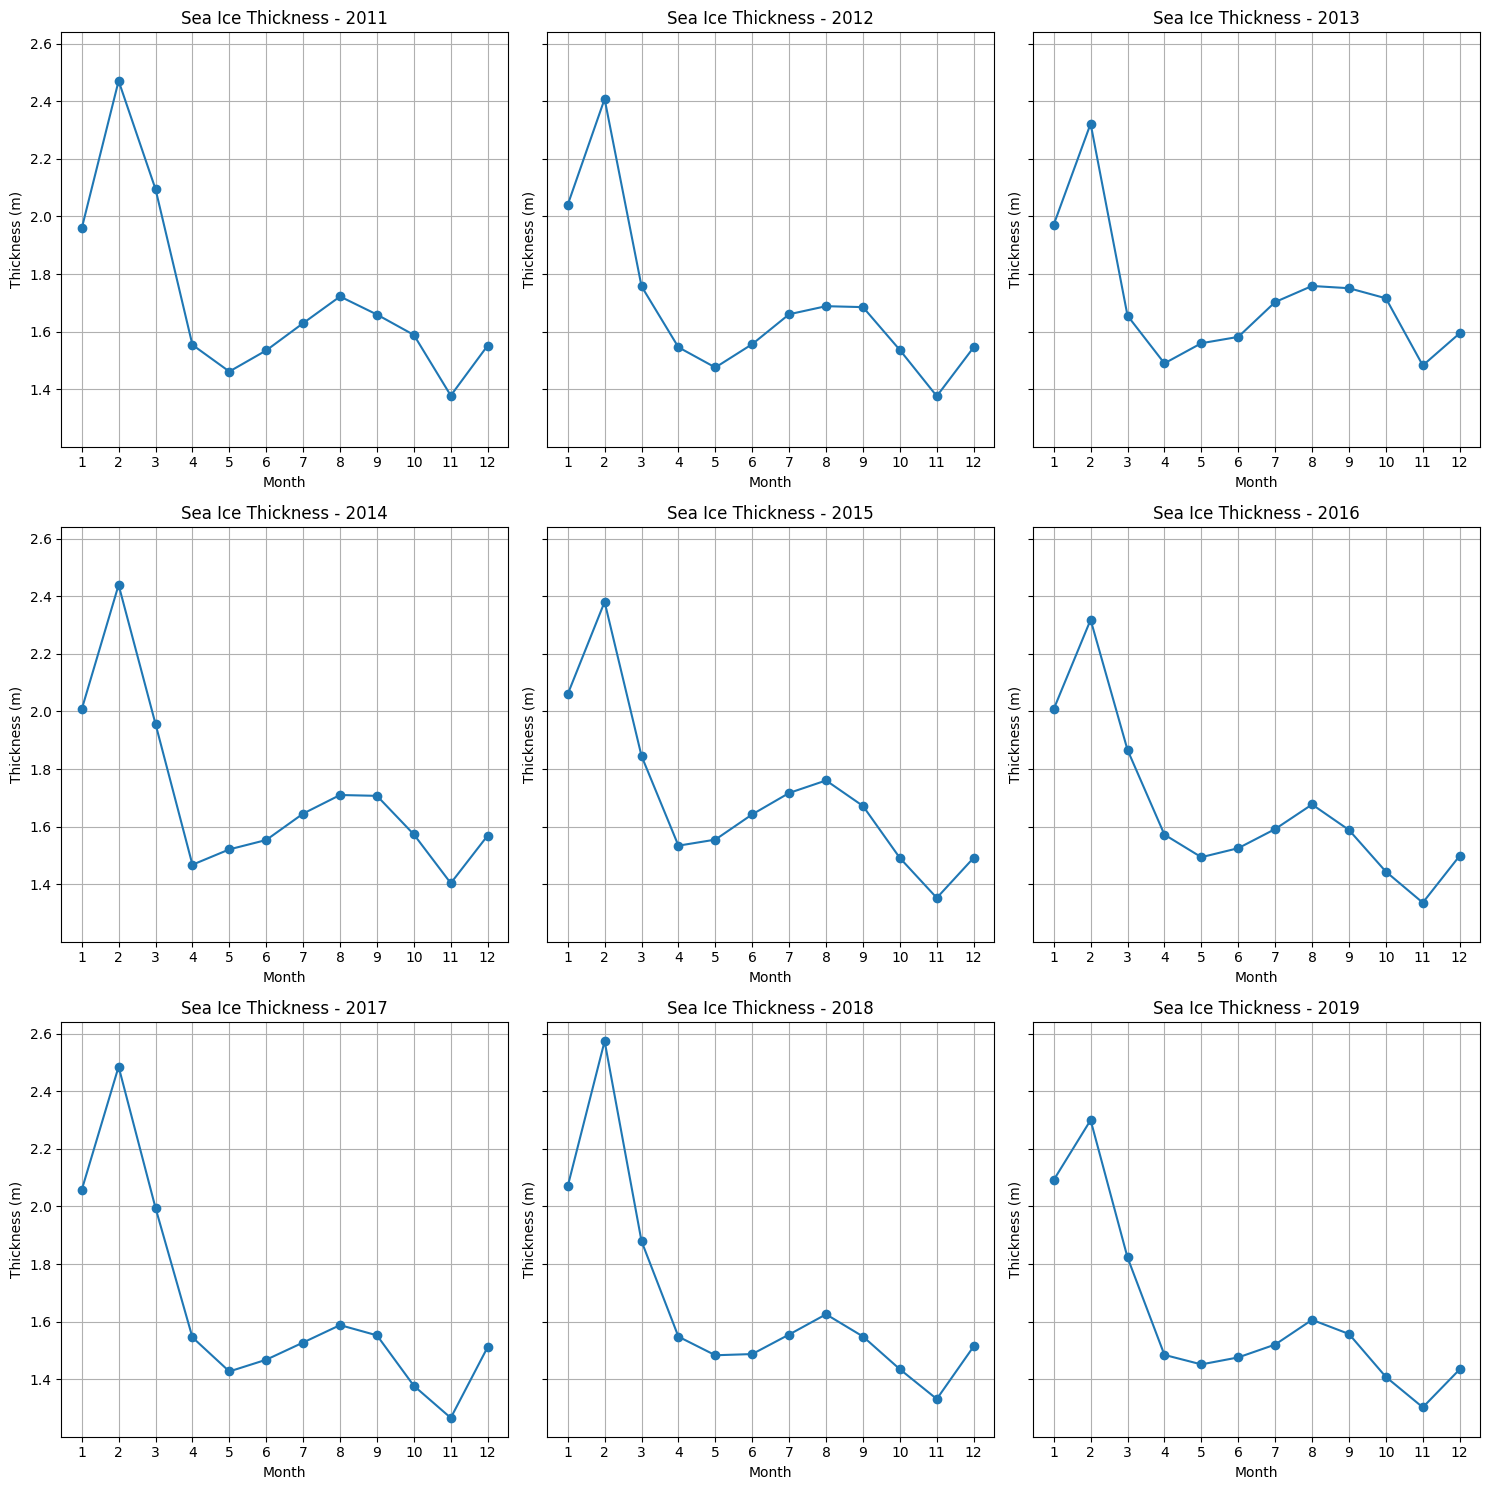

In [ ]:
#getting subplots of years 2011 to 2019 as 2010 and 2020 doesn't have 12 months of data

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert 'time' column to datetime if not already
combined_df['time'] = pd.to_datetime(combined_df['time'])

# Extract year and month
combined_df['year'] = combined_df['time'].dt.year
combined_df['month'] = combined_df['time'].dt.month

# Filter out years 2010 and 2020
filtered_df = combined_df[~combined_df['year'].isin([2010, 2020])]

# Group by year and month, compute mean sea ice thickness
monthly_thickness = filtered_df.groupby(['year', 'month'])['sea_ice_thickness'].mean().reset_index()

# Set up plot
years = sorted(monthly_thickness['year'].unique())
n_years = len(years)
cols = 3
rows = (n_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharey=True)
axes = axes.flatten()

for i, year in enumerate(years):
    ax = axes[i]
    data = monthly_thickness[monthly_thickness['year'] == year]
    ax.plot(data['month'], data['sea_ice_thickness'], marker='o')
    ax.set_title(f"Sea Ice Thickness - {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Thickness (m)")
    ax.set_xticks(range(1, 13))
    ax.grid(True)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-12-c6b6f4e53252>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = combined_df.groupby(pd.Grouper(key='time', freq='M'))['sea_ice_thickness'].mean().reset_index()


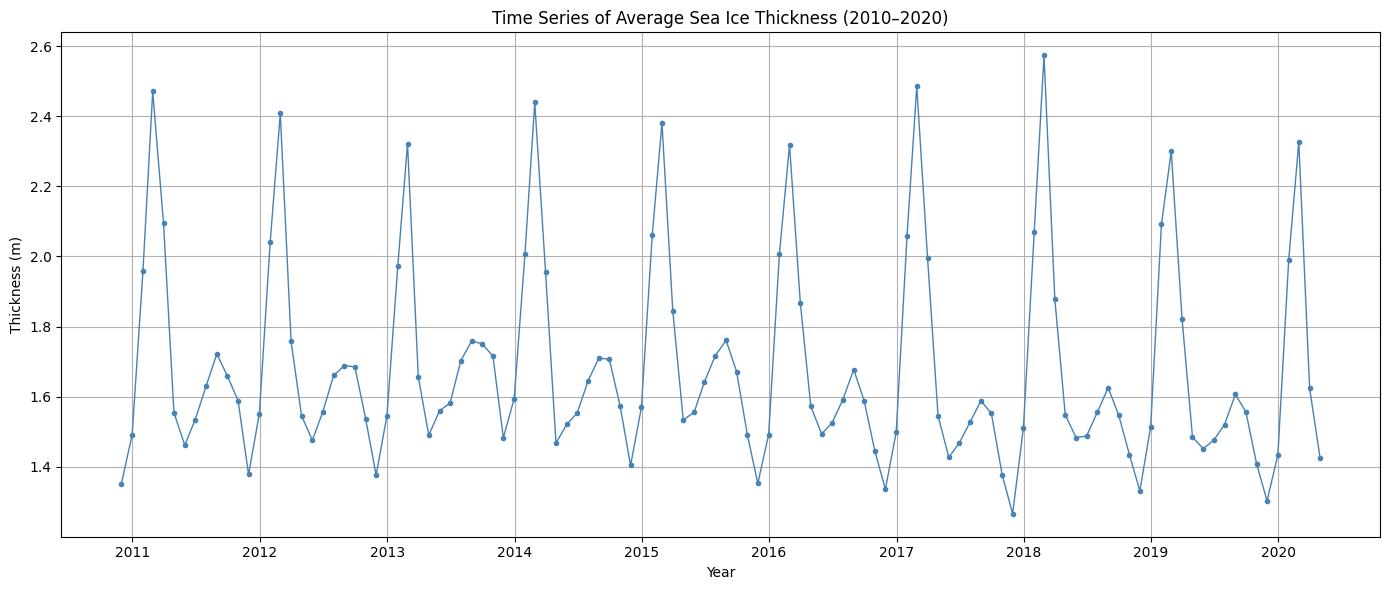

In [ ]:
#time series for monthly wise of each year

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert 'time' column to datetime
combined_df['time'] = pd.to_datetime(combined_df['time'])

# Remove rows with NaN in sea_ice_thickness
combined_df = combined_df.dropna(subset=['sea_ice_thickness'])

# Filter for years 2010 to 2020 (inclusive)
combined_df = combined_df[(combined_df['time'].dt.year >= 2010) & (combined_df['time'].dt.year <= 2020)]

# Group by time (monthly resolution) and compute mean sea ice thickness
monthly_avg = combined_df.groupby(pd.Grouper(key='time', freq='M'))['sea_ice_thickness'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg['time'], monthly_avg['sea_ice_thickness'], color='steelblue', marker='o', markersize=3, linewidth=1)
plt.title("Time Series of Average Sea Ice Thickness (2010–2020)")
plt.xlabel("Year")
plt.ylabel("Thickness (m)")
plt.grid(True)
plt.tight_layout()
plt.show()


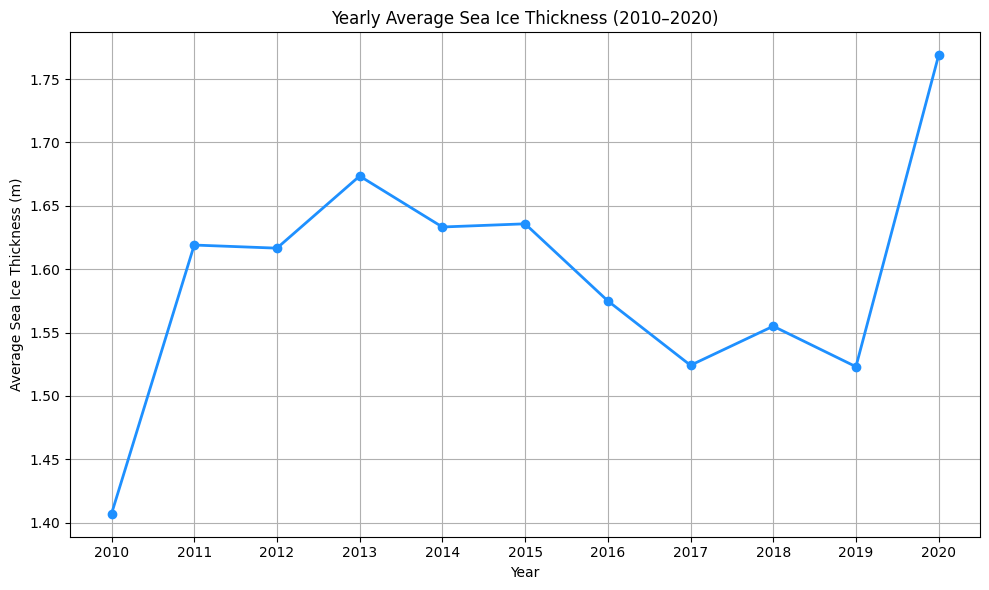

In [ ]:

#time series yearly wise

if not pd.api.types.is_datetime64_any_dtype(combined_df['time']):
    combined_df['time'] = pd.to_datetime(combined_df['time'])

df_filtered = combined_df[
    (combined_df['time'].dt.year >= 2010) &
    (combined_df['time'].dt.year <= 2020)
]

yearly_avg = df_filtered.groupby(df_filtered['time'].dt.year)['sea_ice_thickness'].mean().reset_index()
yearly_avg.columns = ['year', 'sea_ice_thickness']

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['sea_ice_thickness'], marker='o', color='dodgerblue', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average Sea Ice Thickness (m)")
plt.title("Yearly Average Sea Ice Thickness (2010–2020)")
plt.xticks(range(2010, 2021))  # show all years on x-axis
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#checking why there is a sharp rise in the year 2020
#Check number of data points in 2020
df_filtered['year'] = df_filtered['time'].dt.year
df_filtered.groupby('year').size()

,0
year,
2010,18086
2011,94972
2012,99728
2013,98904
2014,101854
2015,99398
2016,94876
2017,91850
2018,95102


In [ ]:
#Check min, max, and mean for 2020
df_filtered[df_filtered['year'] == 2020]['sea_ice_thickness'].describe()

,sea_ice_thickness
count,13456.000000
mean,1.768845
std,1.055098
min,-0.213373
25%,1.014579
50%,1.624962
75%,2.231378
max,10.208194


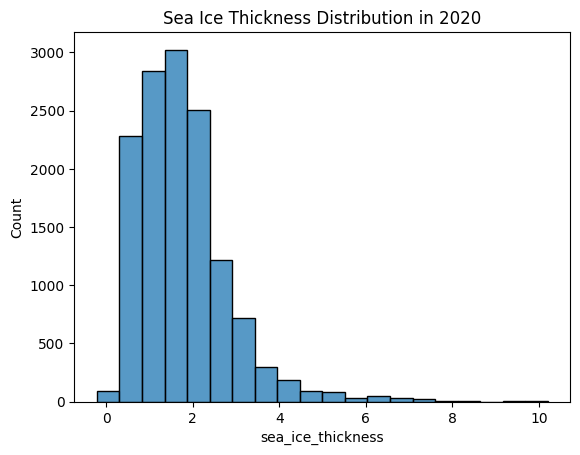

In [ ]:
#Plot distribution for 2020
import seaborn as sns
sns.histplot(df_filtered[df_filtered['year'] == 2020]['sea_ice_thickness'], bins=20)
plt.title("Sea Ice Thickness Distribution in 2020")
plt.show()

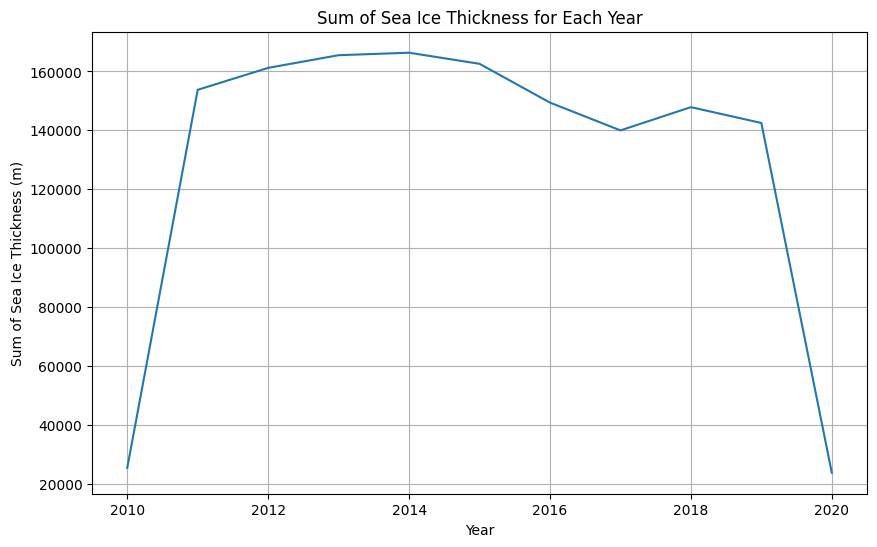

In [ ]:
# sum of sea ice thickness for each year plot

if 'time' in combined_df.columns and 'sea_ice_thickness' in combined_df.columns:
    # Convert 'time' column to datetime objects if necessary
    if not pd.api.types.is_datetime64_any_dtype(combined_df['time']):
        combined_df['time'] = pd.to_datetime(combined_df['time'])

    # Group data by year and calculate the sum of sea ice thickness
    yearly_sum_thickness = combined_df.groupby(combined_df['time'].dt.year)['sea_ice_thickness'].sum()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_sum_thickness.index, yearly_sum_thickness.values)
    plt.xlabel('Year')
    plt.ylabel('Sum of Sea Ice Thickness (m)')
    plt.title('Sum of Sea Ice Thickness for Each Year')
    plt.grid(True)
    plt.show()
else:
    print("Required columns ('time' or 'sea_ice_thickness') not found in the DataFrame.")


In [ ]:
!pip install ffmpeg

In [ ]:
#animation of average sea ice thickness
from matplotlib.animation import FuncAnimation

combined_df_cleaned = combined_df.dropna(subset=['sea_ice_thickness']).copy()
combined_df_cleaned.loc[:, 'time'] = pd.to_datetime(combined_df_cleaned['time'])
combined_df_cleaned.loc[:, 'year'] = combined_df_cleaned['time'].dt.year

df_filtered = combined_df_cleaned[
    (combined_df_cleaned['year'] >= 2011) & (combined_df_cleaned['year'] <= 2019)
].copy()

yearly_avg = df_filtered.groupby('year')['sea_ice_thickness'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], marker='o', color='dodgerblue', linewidth=2)
text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, color='darkblue')

ax.set_xlim(2011, 2019)
ax.set_ylim(0, yearly_avg['sea_ice_thickness'].max() + 0.5)
ax.set_xlabel("Year")
ax.set_ylabel("Average Sea Ice Thickness (m)")
ax.set_title("Average Sea Ice Thickness (2011–2019)")

# Init function
def init():
    line.set_data([], [])
    text.set_text('')
    return line, text

# Update function
def update(frame):
    x = yearly_avg['year'].iloc[:frame + 1].values
    y = yearly_avg['sea_ice_thickness'].iloc[:frame + 1].values
    line.set_data(x, y)
    text.set_text(f"Year: {x[-1]}  |  Thickness: {y[-1]:.2f} m")
    return line, text

# Create animation
anim = FuncAnimation(
    fig, update, frames=len(yearly_avg), init_func=init,
    blit=True, interval=1000
)

anim.save('sea_ice_thickness_2011_2020.mp4', fps=1, extra_args=['-vcodec', 'libx264'])


plt.close()


In [ ]:
from IPython.display import Video

Video('sea_ice_thickness_2011_2020.mp4', embed=True)


In [ ]:
#animation of the monthly sea icea thickness

combined_df_cleaned = combined_df.dropna(subset=['sea_ice_thickness']).copy()
combined_df_cleaned['time'] = pd.to_datetime(combined_df_cleaned['time'])


df_filtered = combined_df_cleaned[
    (combined_df_cleaned['time'].dt.year > 2009) &
    (combined_df_cleaned['time'].dt.year < 2021)
].copy()


df_filtered['year_month'] = df_filtered['time'].dt.to_period('M').dt.to_timestamp()


monthly_avg = df_filtered.groupby('year_month')['sea_ice_thickness'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

def update(frame):
    ax.clear()
    x = monthly_avg['year_month'][:frame + 1]
    y = monthly_avg['sea_ice_thickness'][:frame + 1]
    ax.fill_between(x, y, color='skyblue', alpha=0.5)
    ax.plot(x, y, color='blue')
    ax.set_title(f"Monthly Sea Ice Thickness (2010–2020)\nUp to {x.iloc[-1].strftime('%b %Y')}")
    ax.set_xlabel("Time (Monthly)")
    ax.set_ylabel("Average Sea Ice Thickness (m)")
    ax.set_ylim(0, monthly_avg['sea_ice_thickness'].max() + 0.5)
    ax.set_xlim(monthly_avg['year_month'].min(), monthly_avg['year_month'].max())
    plt.xticks(rotation=45)
    return ax,


anim = FuncAnimation(fig, update, frames=len(monthly_avg), interval=200)


anim.save('sea_ice_thickness_area_plot.mp4', fps=5, extra_args=['-vcodec', 'libx264'])


plt.close()


In [ ]:
from IPython.display import Video
Video('sea_ice_thickness_area_plot.mp4', embed=True)
